In [70]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [71]:
df = pd.read_csv('day.csv')

In [72]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [73]:
df.shape

(730, 16)

In [74]:
df.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        1           1   
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspee

In [75]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [76]:
#checking the columns with null values.
nullcheck=[k for (k,v) in (df.isnull().mean().to_dict()).items() if v>0]
nullcheck

[]

In [77]:
df_copy = df.copy()
df_copy.shape

(730, 16)

In [78]:
df_copy.drop_duplicates(inplace = True)
df_copy.shape

(730, 16)

In [79]:
df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hum': 'humidity', 'temp': 'temperature', 'cnt': 'count'}, inplace=True)
df.drop(['instant', 'date', 'casual', 'registered'], axis=1, inplace=True)


In [80]:
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['month'] = df['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov' , 12: "Dec"})
df['weekday'] = df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Misty', 3: 'Light snow/rain', 4: 'Heavy snow/rain'})

In [81]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [82]:
#separate numerical and categorial variables 

ints = [k for (k,v) in (df.dtypes.to_dict().items()) if v=='int64']
floats = [k for (k,v) in (df.dtypes.to_dict().items()) if v=='float64']
objects = [k for (k,v) in (df.dtypes.to_dict().items()) if v=='object']

In [83]:
ints.remove('count')

In [84]:
cat_cols= objects+ints
cat_cols

['season', 'month', 'weekday', 'weathersit', 'year', 'holiday', 'workingday']

In [85]:
num_cols = floats +['count']
num_cols

['temperature', 'atemp', 'humidity', 'windspeed', 'count']

<Figure size 1200x1600 with 0 Axes>

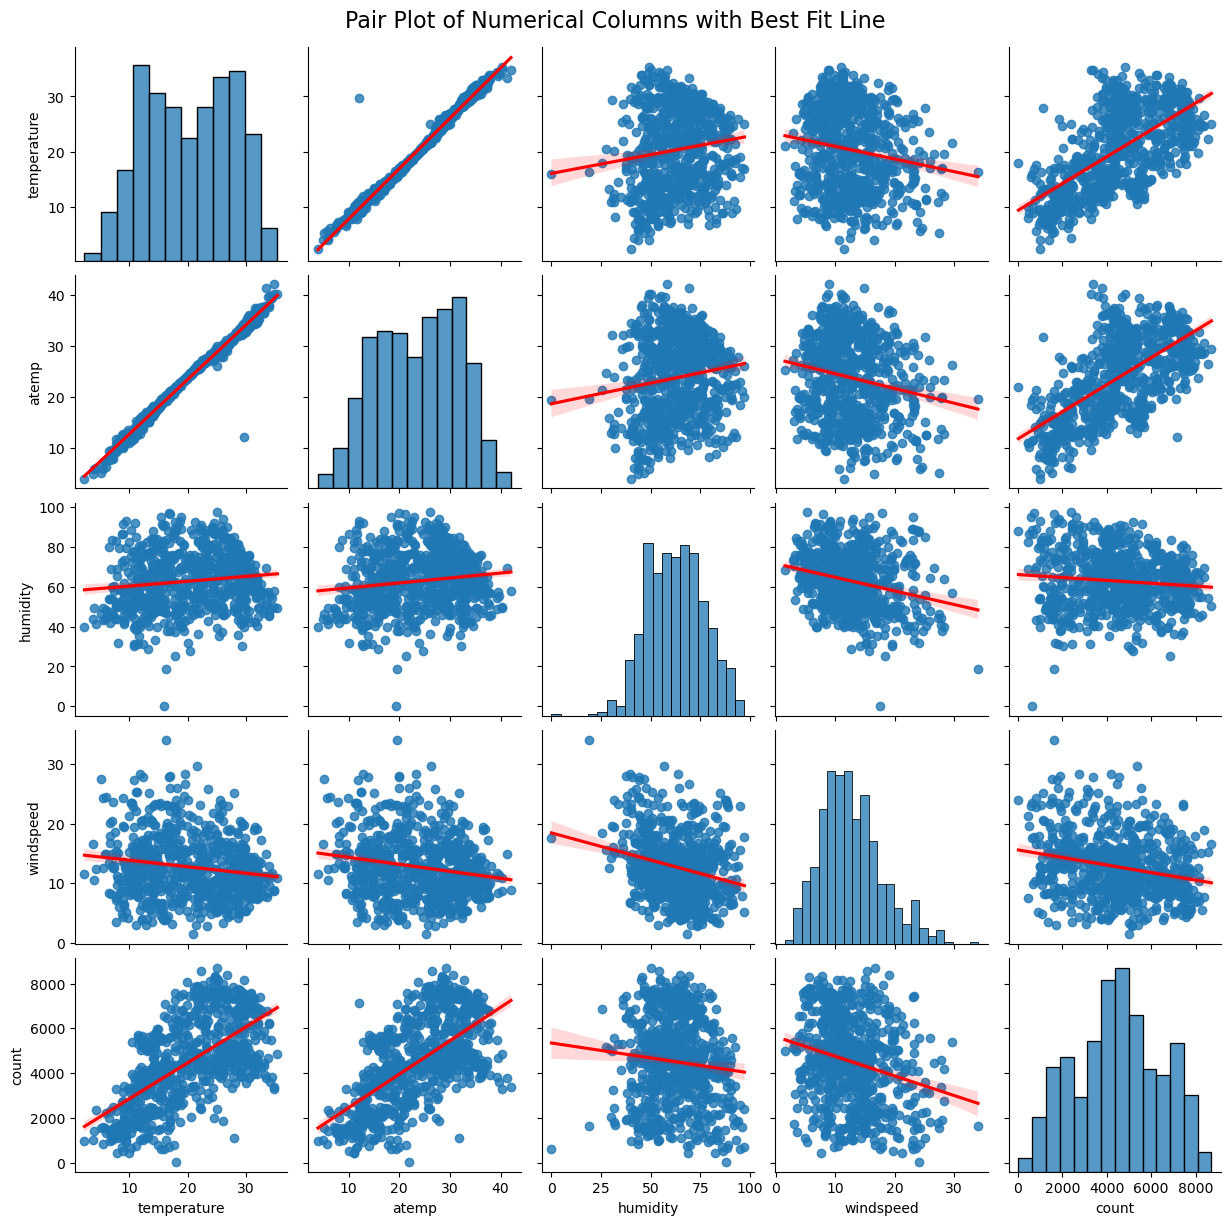

In [86]:
plt.figure(figsize=(12, 16))
g = sns.pairplot(df[num_cols], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.subplots_adjust(top=0.95)
plt.suptitle('Pair Plot of Numerical Columns with Best Fit Line', fontsize=16)
plt.show()

*****************************************************************************************************************************


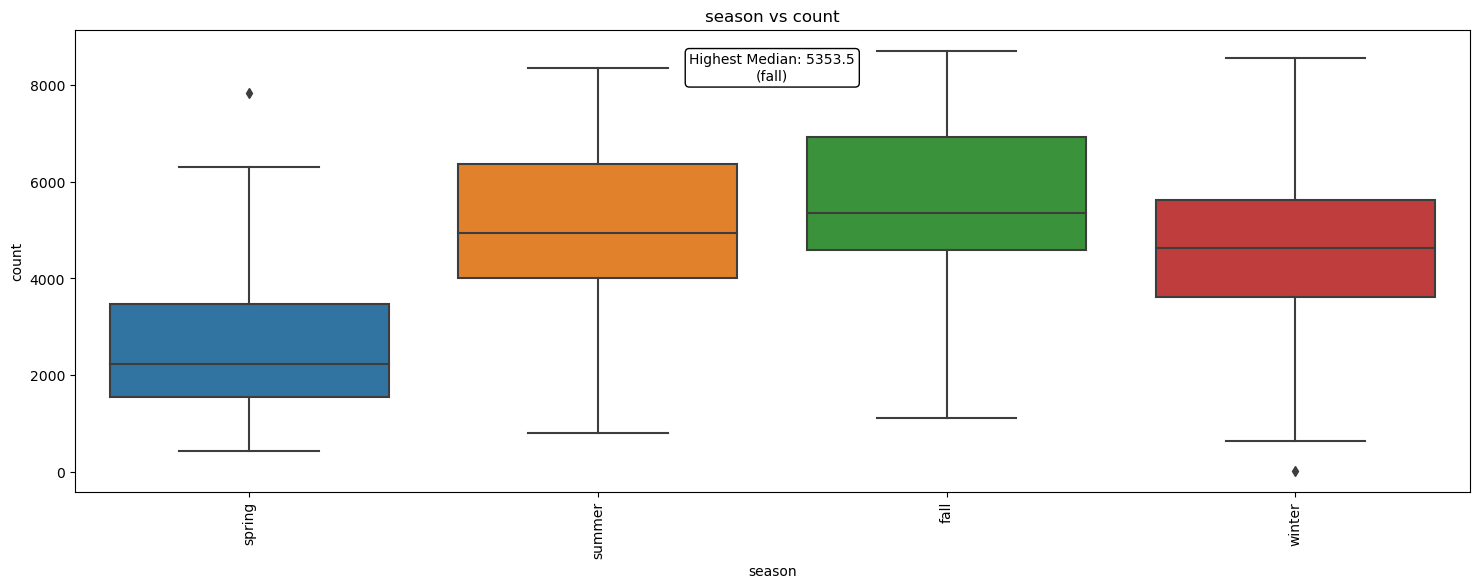

*****************************************************************************************************************************


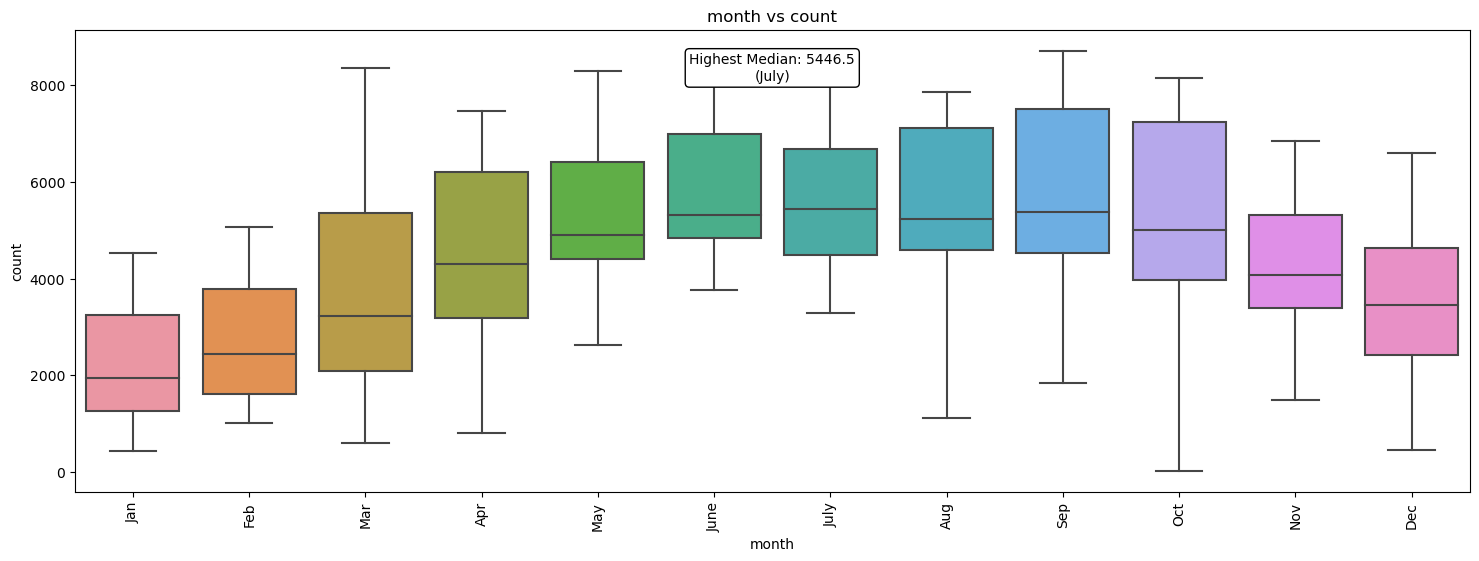

*****************************************************************************************************************************


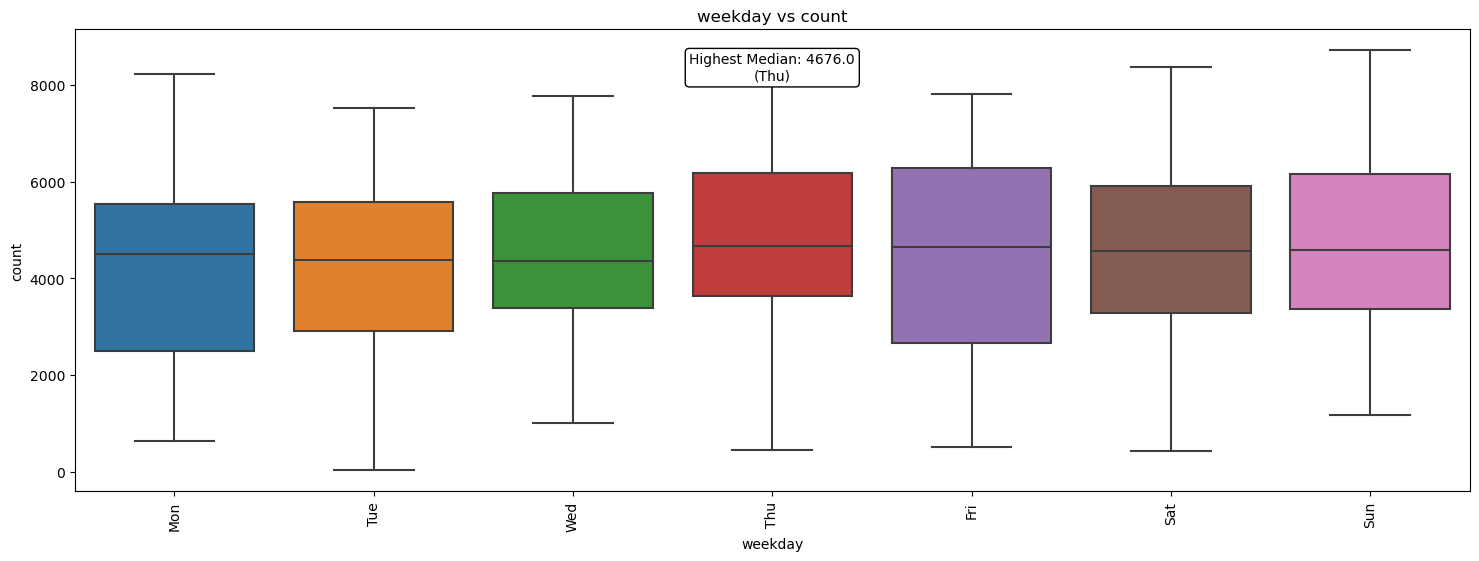

*****************************************************************************************************************************


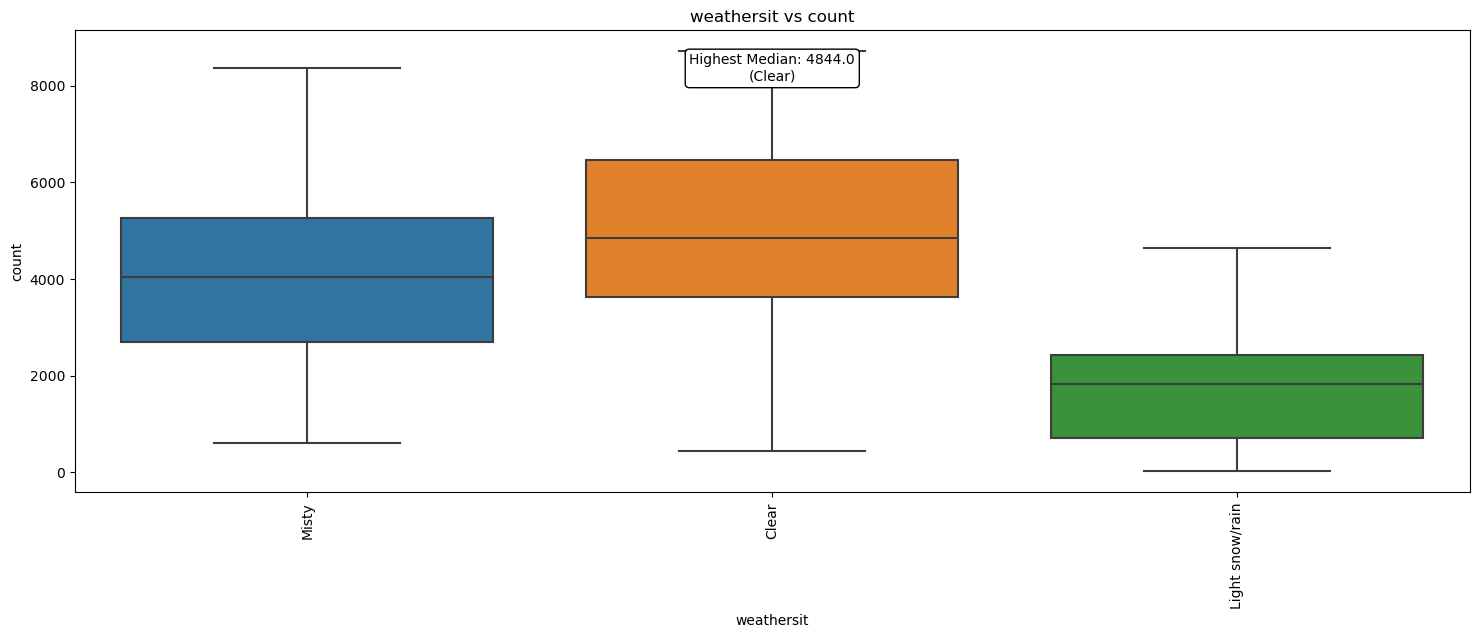

*****************************************************************************************************************************


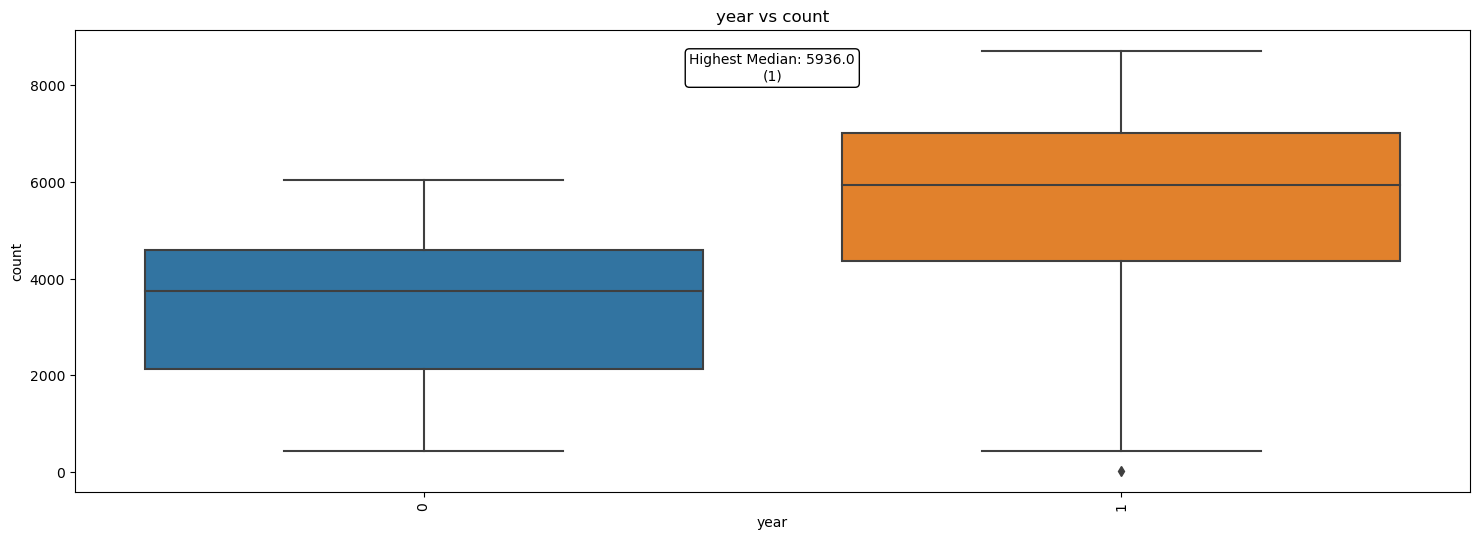

*****************************************************************************************************************************


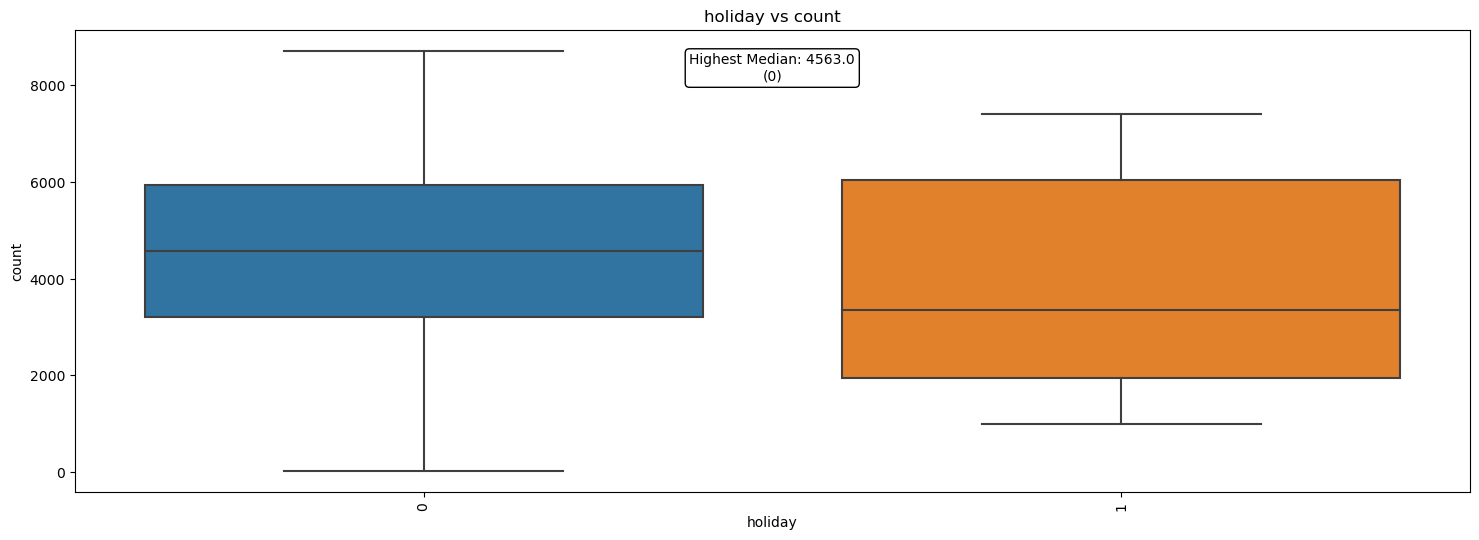

*****************************************************************************************************************************


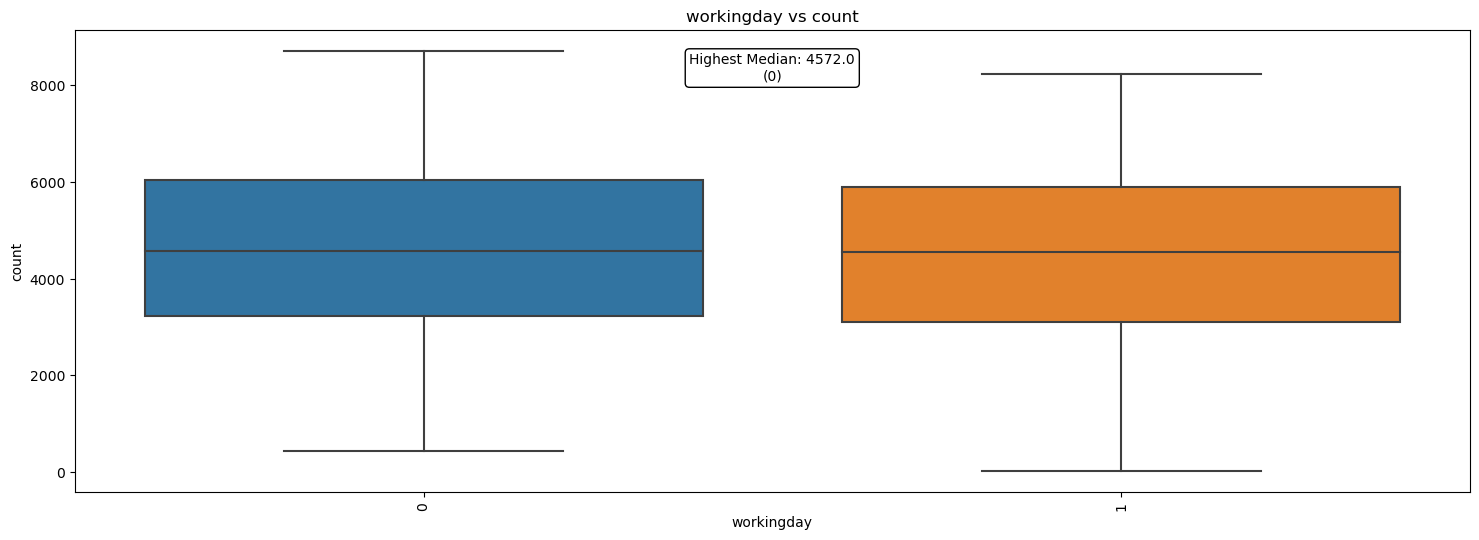

In [87]:
for i in cat_cols:
    plt.figure(figsize=(18, 6))
    ax = sns.boxplot(x=i, y='count', data=df)
    plt.title(f"{i} vs {'count'}")
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.ylabel('count')
    highest_median = df.groupby(i)['count'].median().max()
    highest_median_category = df.groupby(i)['count'].median().idxmax()
    ax.annotate(f'Highest Median: {highest_median}\n({highest_median_category})', xy=(0.5, 0.95),
                xycoords='axes fraction', ha='center', va='top', bbox=dict(boxstyle='round', facecolor='white'))
    print('*'*125)
    plt.show()

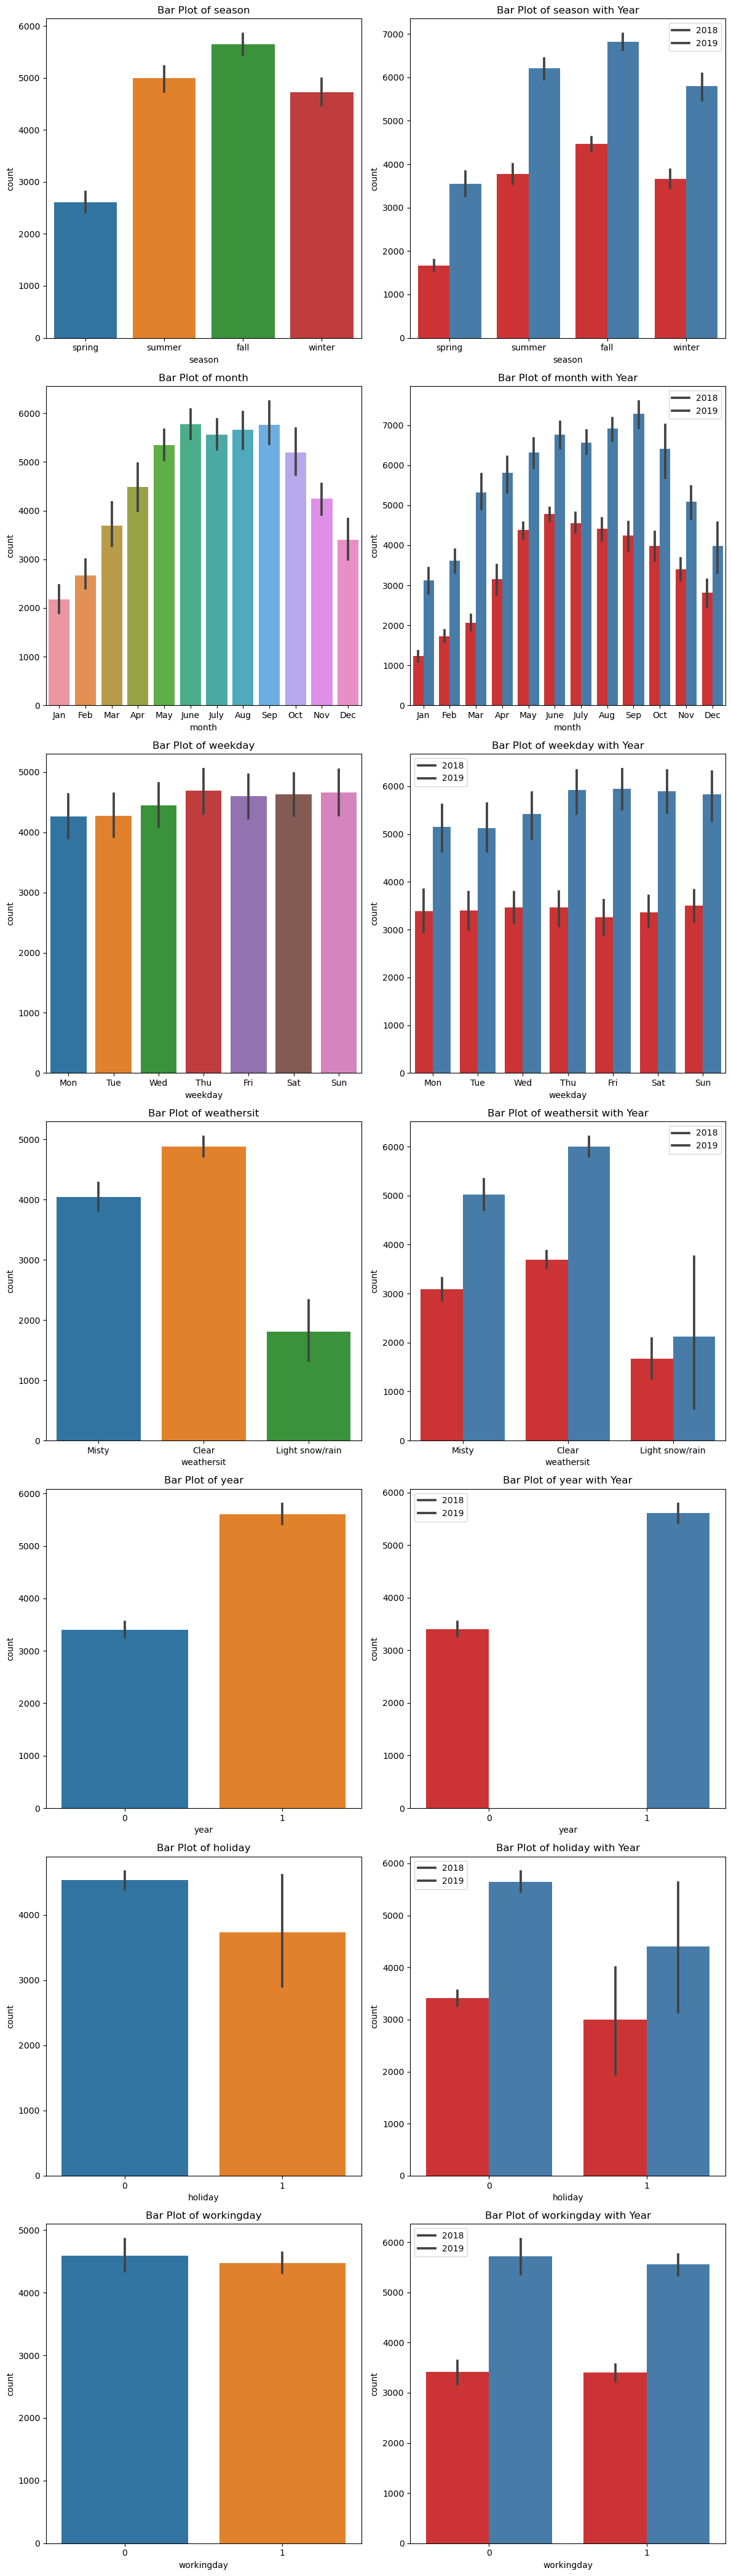

In [88]:
plt.figure(figsize=(12, 6 * len(cat_cols))) 
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 2, i * 2 - 1) 
    sns.barplot(x=col, y='count', data=df)
    plt.title(f'Bar Plot of {col}')
    plt.subplot(len(cat_cols), 2, i * 2) 
    sns.barplot(x=col, y='count', data=df, hue='year', palette='Set1')
    plt.title(f'Bar Plot of {col} with Year')
    plt.legend(labels=['2018', '2019'])
plt.tight_layout()
plt.show()

Highest Correlation: temperature - atemp (0.99)


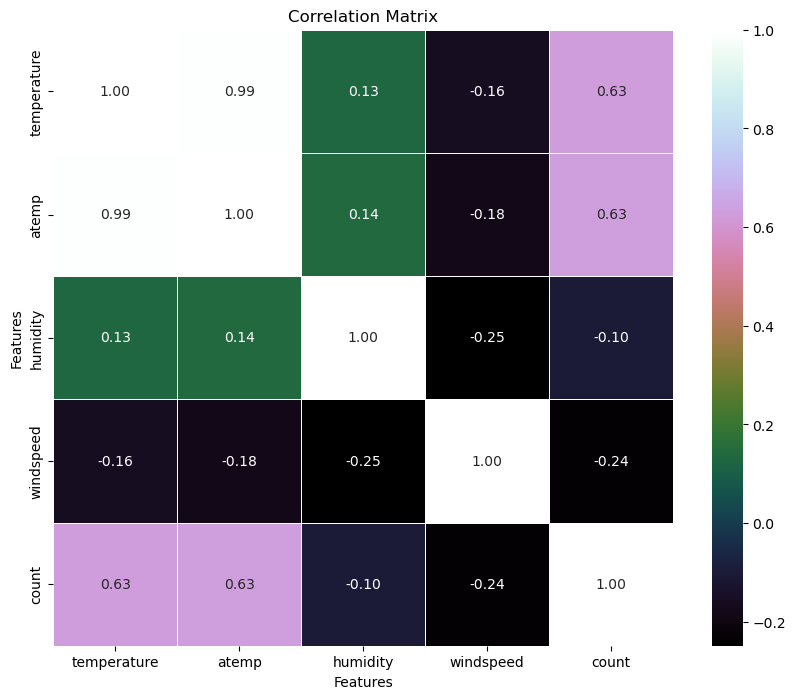

In [89]:
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix', fmt=".2f", linewidths=0.5)
highest_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
highest_corr = highest_corr[highest_corr != 1.0]
highest_corr_labels = highest_corr.idxmax()
var1, var2 = highest_corr_labels
corr_value = correlation_matrix.loc[var1, var2]
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
print(f'Highest Correlation: {var1} - {var2} ({corr_value:.2f})')
plt.show()

In [90]:
df_dummy = df  
dummy_frames = {}
for i in objects:
    dummy_frames[str(i) + '_df'] = pd.get_dummies(df[i], drop_first=True)
for i in dummy_frames.values():
    df_dummy = pd.concat([df_dummy, i], axis=1)
df_dummy.drop(objects, inplace= True, axis=1)

In [91]:
df_dummy.head()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,count,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light snow/rain,Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df_dummy.shape

(730, 30)

In [93]:
np.random.seed(0)
df_train, df_test = train_test_split(df_dummy, train_size=0.7, random_state=100)
print("Training dataset shape:", df_train.shape)
print("Testing dataset shape:", df_test.shape)
scaler = MinMaxScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

Training dataset shape: (510, 30)
Testing dataset shape: (220, 30)


In [94]:
df_train.head()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,count,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light snow/rain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


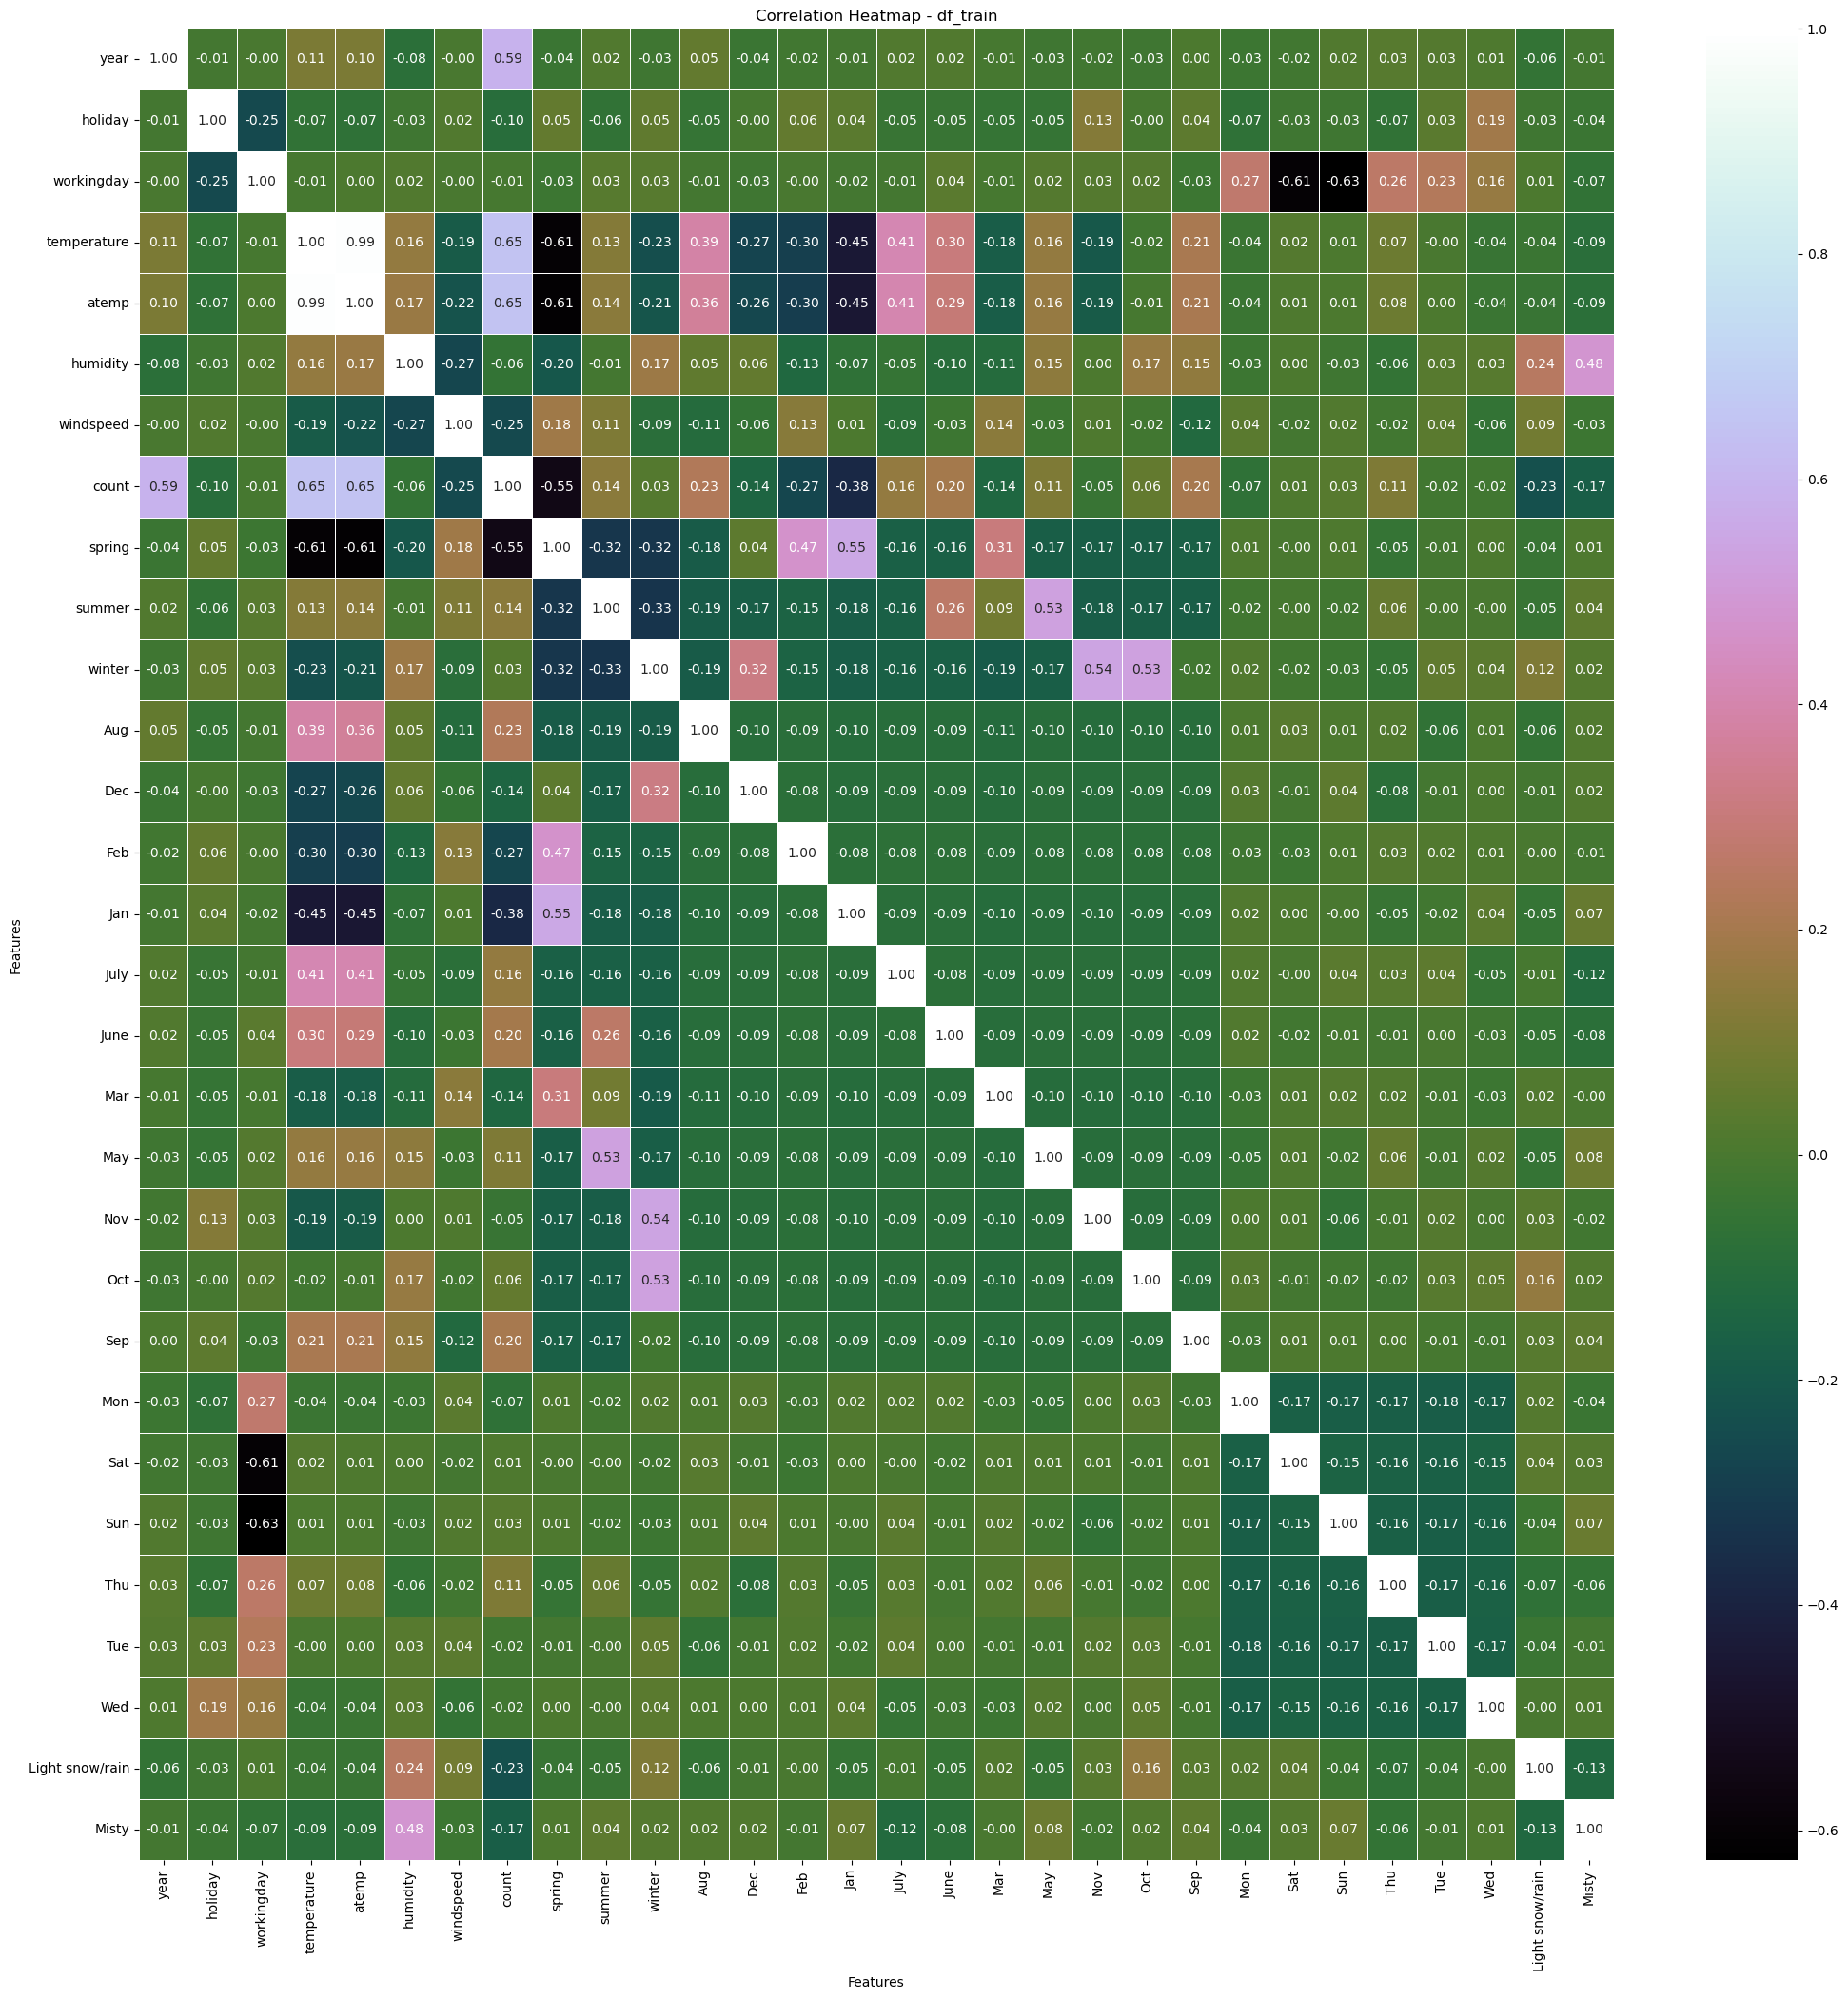

In [95]:
corr_matrix = df_train.corr()
plt.figure(figsize=(25, 25))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='cubehelix', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap - df_train')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

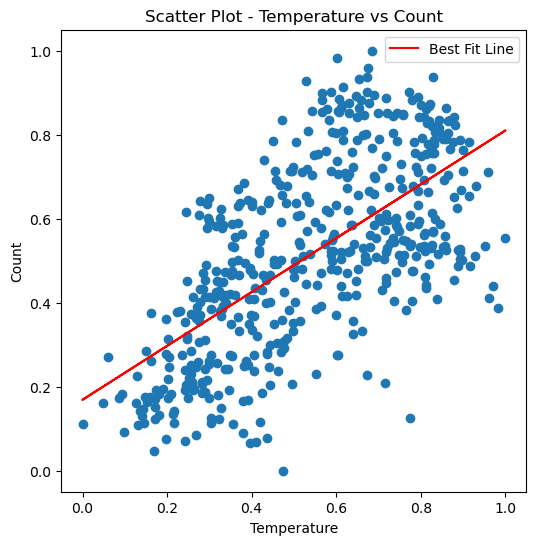

In [96]:
plt.figure(figsize=[6, 6])
plt.scatter(df_train['temperature'], df_train['count'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Scatter Plot - Temperature vs Count')
x = df_train['temperature']
y = df_train['count']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', label='Best Fit Line')
plt.legend()
plt.show()

In [97]:
y_train = df_train['count']
X_train = df_train.drop('count', axis=1)
reg_model = LinearRegression()
rfe = RFE(estimator= reg_model, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [98]:
selected_features = [(feat, support, rank) for feat, support, rank in zip(X_train.columns, rfe.support_, rfe.ranking_) if support]

In [99]:
selected_features

[('year', True, 1),
 ('holiday', True, 1),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Dec', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('Nov', True, 1),
 ('Sep', True, 1),
 ('Light snow/rain', True, 1),
 ('Misty', True, 1)]

In [100]:
selected_columns = [feature for feature, support, rank in selected_features]
selected_columns

['year',
 'holiday',
 'temperature',
 'humidity',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'Dec',
 'Jan',
 'July',
 'Nov',
 'Sep',
 'Light snow/rain',
 'Misty']

In [101]:
X_train_rfe = X_train[selected_columns]

In [102]:
X_train_reg_model_1 = sm.add_constant(X_train_rfe)
reg_model_1 = sm.OLS(y_train, X_train_reg_model_1).fit()
print(reg_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          8.15e-189
Time:                        23:15:43   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3197      0.036     

In [103]:
def calVIF(df):
    vif = pd.DataFrame({'Features': df.columns, 'VIF': [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]})
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

In [104]:
vif_result = calVIF(X_train_rfe)
vif_result

,Features,VIF
3,humidity,30.89
2,temperature,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,Misty,2.32
0,year,2.09
11,Nov,1.85
9,Jan,1.75


In [105]:
X_train_updated = X_train_rfe.drop(['humidity'], axis=1)
vif_result_new = calVIF(X_train_updated)

In [106]:
vif_result_new

,Features,VIF
2,temperature,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,year,2.07
10,Nov,1.81
8,Jan,1.66
9,July,1.59
13,Misty,1.57


In [107]:
X_train_reg_model_2 = sm.add_constant(X_train_updated)
reg_model_2 = sm.OLS(y_train, X_train_reg_model_2).fit()
print(reg_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          4.75e-186
Time:                        23:15:43   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2450      0.032     

In [108]:
# Dropping 'Nov' from X_train_rfe as it shows high p values
X_train_updated = X_train_updated.drop(['Nov'], axis=1)
X_train_reg_model_3 = sm.add_constant(X_train_updated)
reg_model_3 = sm.OLS(y_train, X_train_reg_model_3).fit()
print(reg_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          2.74e-186
Time:                        23:15:43   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2283      0.031     

In [109]:
# Dropping 'Dec' from X_train_rfe as it shows high p values
X_train_updated = X_train_updated.drop(['Dec'], axis=1)
X_train_reg_model_4 = sm.add_constant(X_train_updated)
reg_model_4 = sm.OLS(y_train, X_train_reg_model_4).fit()
print(reg_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          8.14e-187
Time:                        23:15:43   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2154      0.030     

In [110]:
# Dropping 'Jan' from X_train_rfe as it shows high p values
X_train_updated = X_train_updated.drop(['Jan'], axis=1)
X_train_reg_model_5 = sm.add_constant(X_train_updated)
reg_model_5 = sm.OLS(y_train, X_train_reg_model_5).fit()
print(reg_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          5.06e-187
Time:                        23:15:43   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1994      0.030     

In [111]:
# Dropping 'July' from X_train_rfe as it shows high p values
X_train_updated = X_train_updated.drop(['July'], axis=1)
X_train_reg_model_6 = sm.add_constant(X_train_updated)
reg_model_6 = sm.OLS(y_train, X_train_reg_model_6).fit()
print(reg_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          1.47e-186
Time:                        23:15:43   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1909      0.030     

In [112]:
calVIF(X_train_updated)

,Features,VIF
3,windspeed,4.60
2,temperature,3.84
0,year,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,Misty,1.55
7,Sep,1.23
8,Light snow/rain,1.08
1,holiday,1.04


In [113]:
reg_model_6.params

const              0.190855
year               0.234132
holiday           -0.096316
temperature        0.477737
windspeed         -0.148098
spring            -0.055406
summer             0.062076
winter             0.094476
Sep                0.090998
Light snow/rain   -0.285031
Misty             -0.078741
dtype: float64

In [114]:
X_train_reg_model_6

,const,year,holiday,temperature,windspeed,spring,summer,winter,Sep,Light snow/rain,Misty
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,1
111,1.0,0,0,0.345824,0.380981,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,1,0,0,0,1


In [115]:
y_train_pred = reg_model_6.predict(X_train_reg_model_6)

Text(0.5, 0, 'Errors')

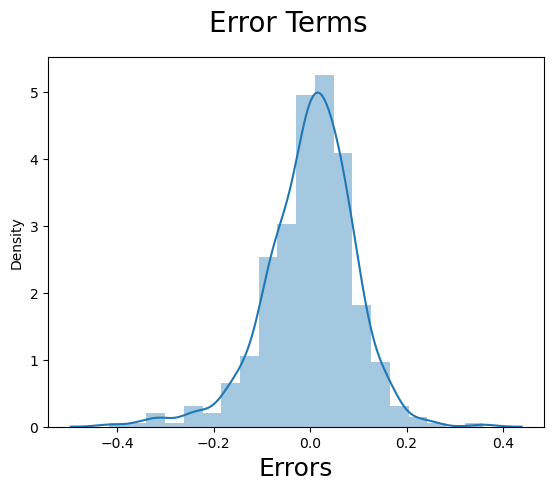

In [116]:
#checking error terms are normally distributed or not, inorder to validate our assumption.
# Plot the histogram of the error terms
plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
plt.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)

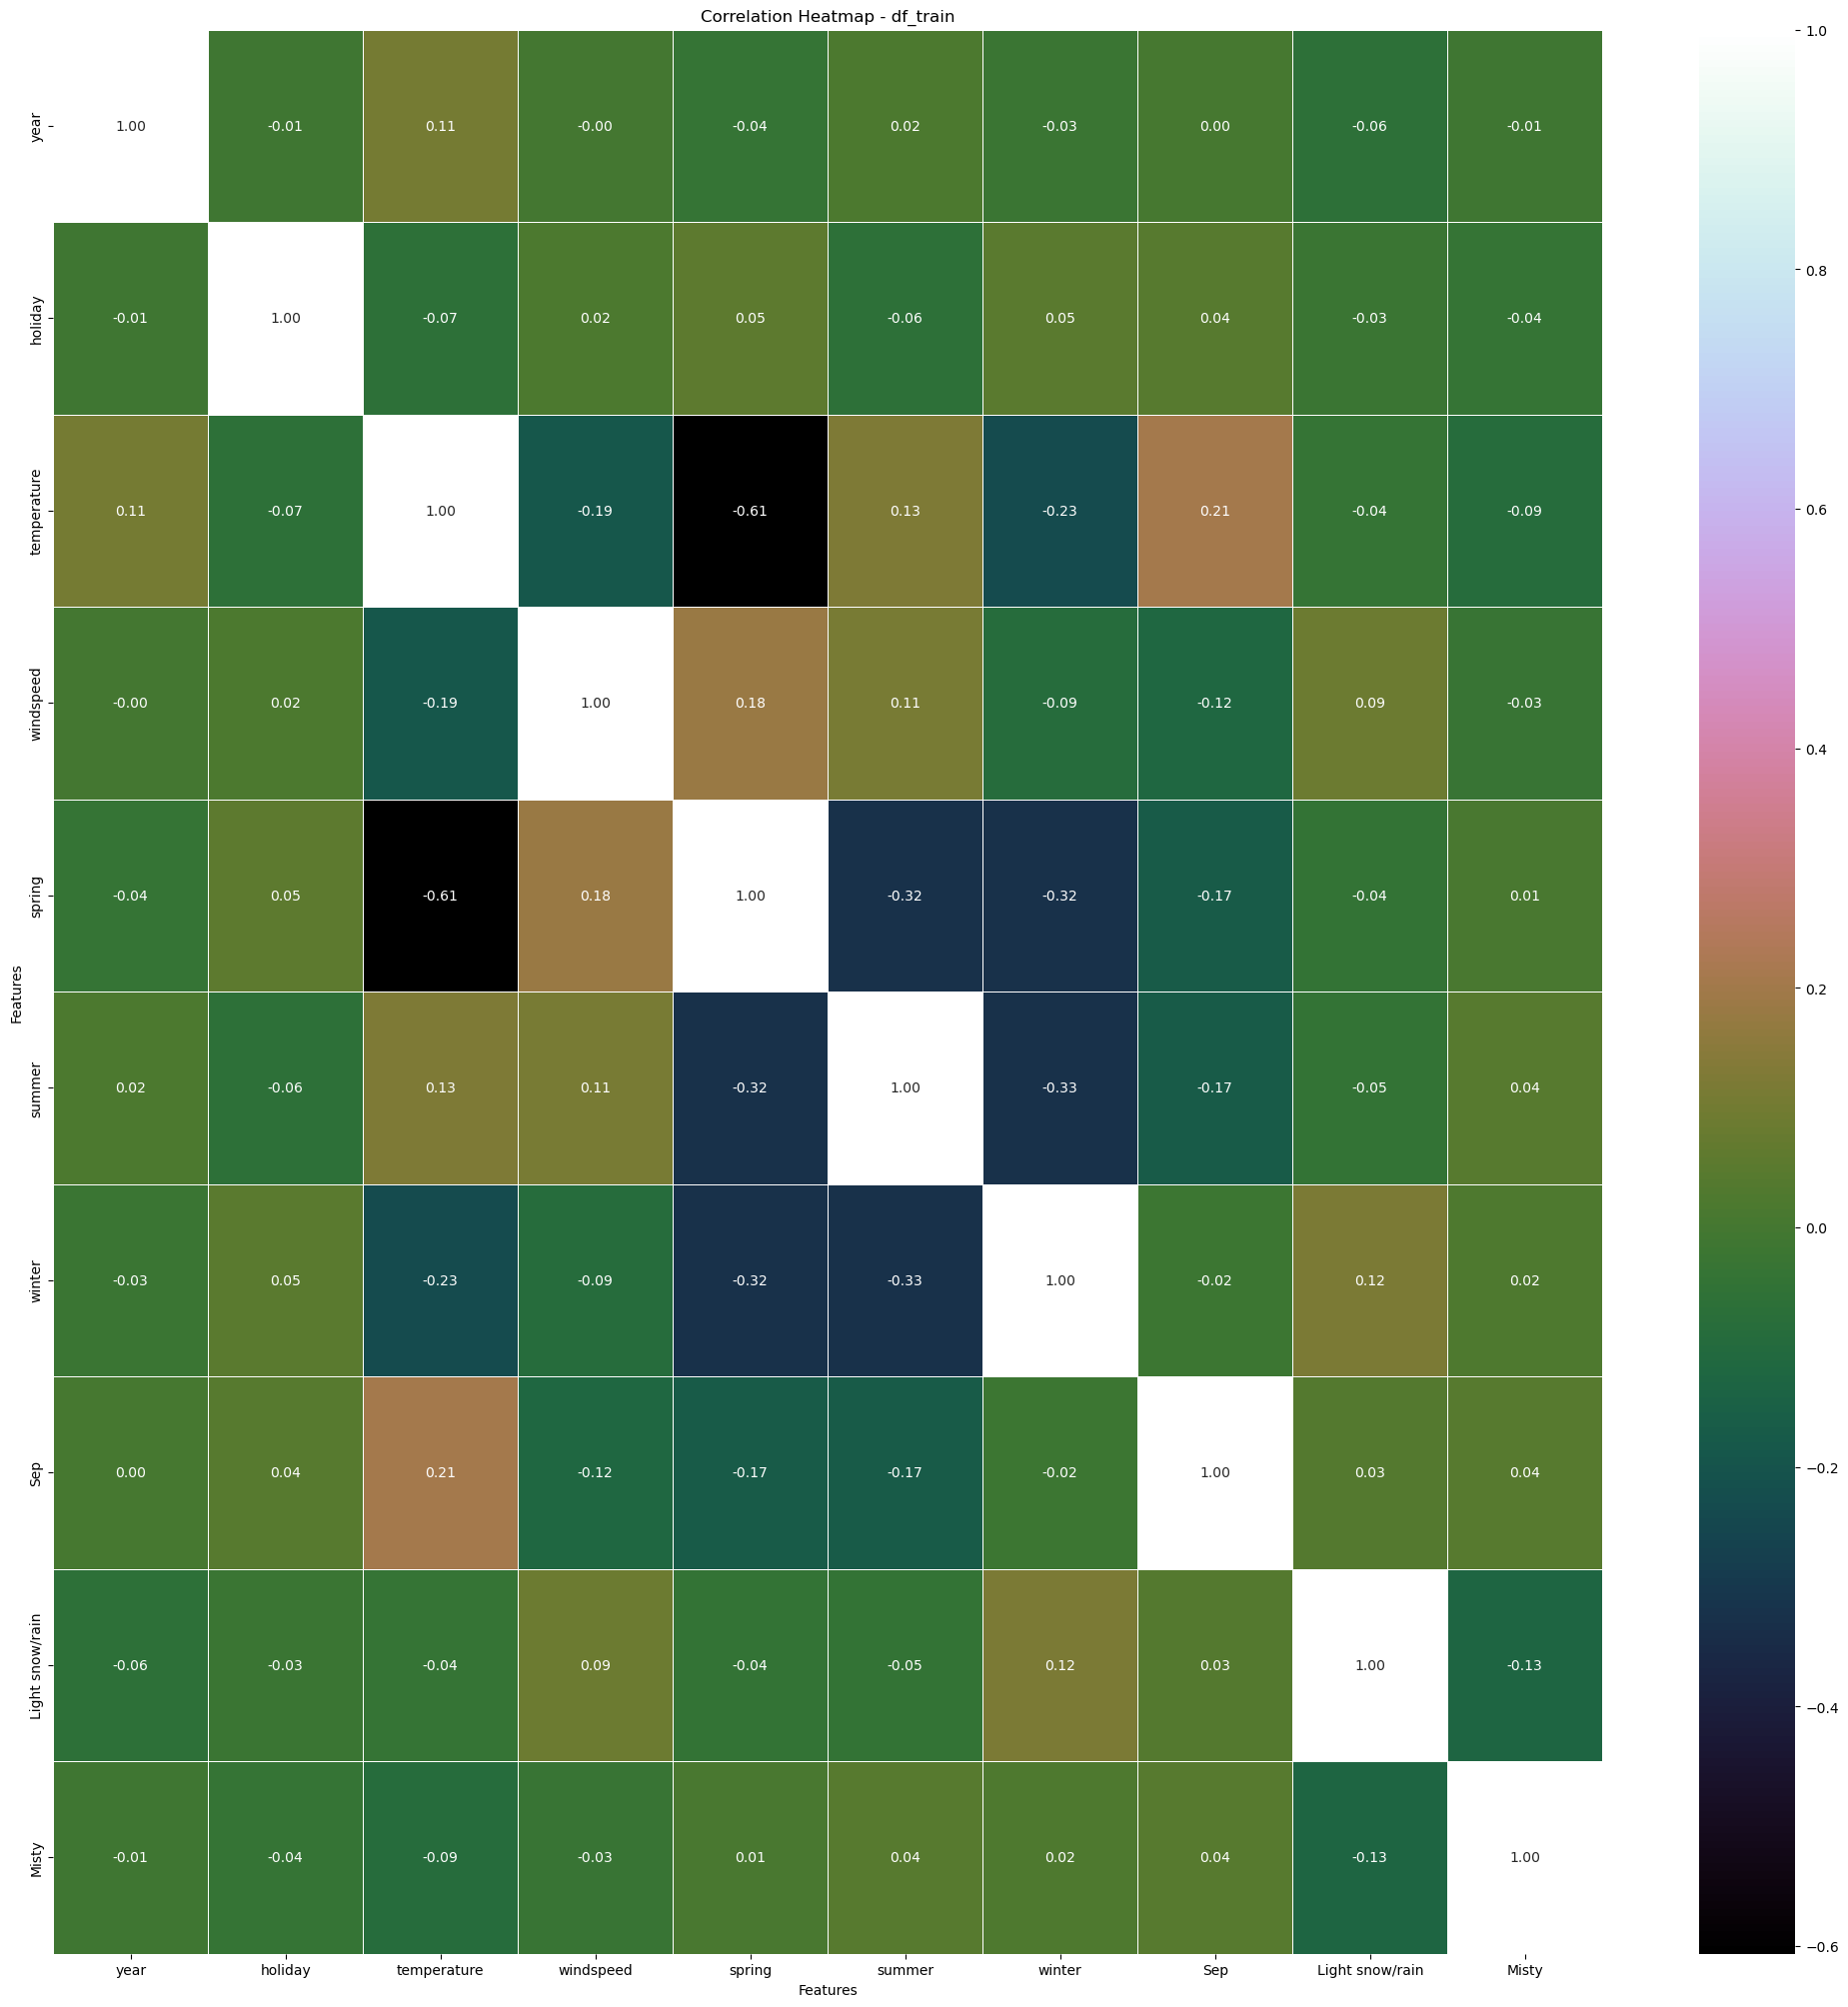

In [117]:
corr_matrix = X_train_updated.corr()
plt.figure(figsize=(25, 25))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='cubehelix', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap - df_train')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

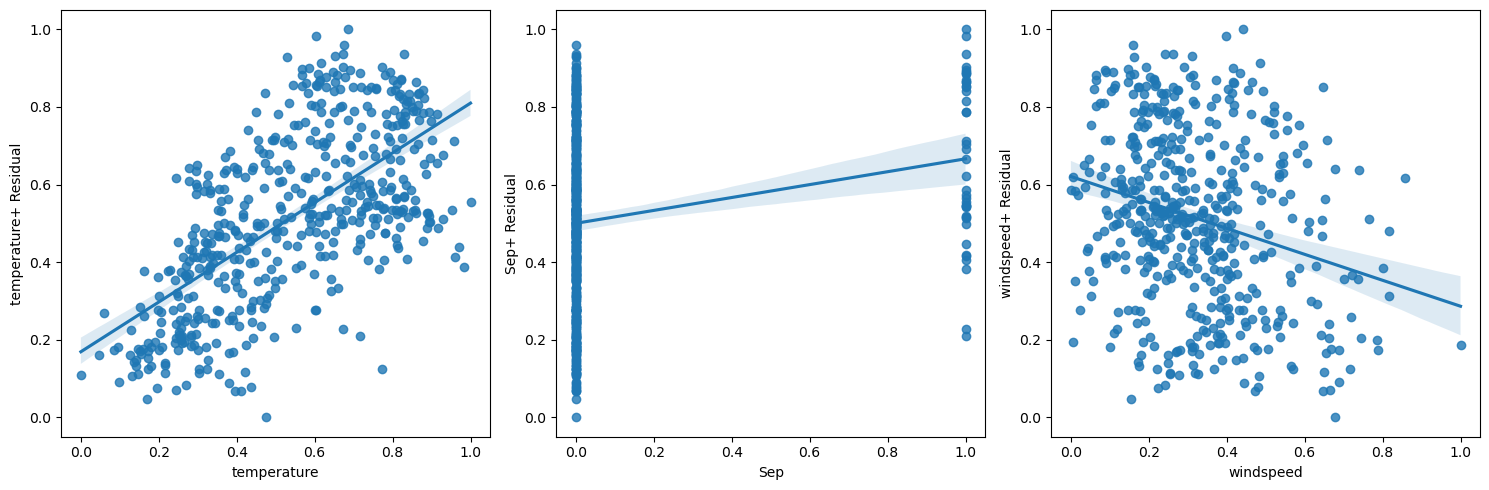

In [118]:
variables= ['temperature','Sep','windspeed']
fig, ax = plt.subplots(1, len(variables), figsize=(15, 5))
for i, var in enumerate(variables):
    sns.regplot(x=X_train_updated[var], y=reg_model_6.resid + reg_model_6.predict(sm.add_constant(X_train_updated)), ax=ax[i])
    ax[i].set_xlabel(var)
    ax[i].set_ylabel(str(variables[i])+'+ Residual')
plt.tight_layout()
plt.show()

In [119]:
df_test[num_cols] = scaler.transform(df_test[num_cols])
df_test.head()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,count,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light snow/rain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [120]:
y_test = df_test['count']
X_test = df_test.drop('count', axis=1)  
cols=X_train_updated.columns
X_test = df_test[cols]
X_test_reg_model_6 = sm.add_constant(X_test)
y_pred = reg_model_6.predict(X_test_reg_model_6)
y_test = y_test.values.reshape(-1, 1)
r2 = round(r2_score(y_test, y_pred), 4)
r2

0.8038

In [121]:
X_test.head()

,year,holiday,temperature,windspeed,spring,summer,winter,Sep,Light snow/rain,Misty
184,0,1,0.831783,0.084219,0,0,0,0,0,1
535,1,0,0.901354,0.153728,0,1,0,0,0,0
299,0,0,0.511964,0.334206,0,0,1,0,0,1
221,0,0,0.881625,0.339570,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,1,0,0,0,0


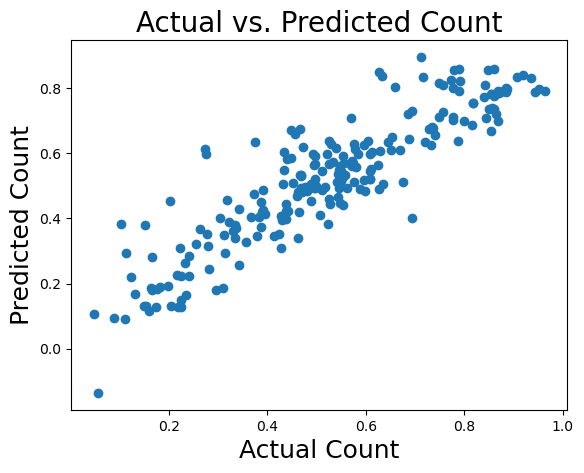

In [122]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.set_title('Actual vs. Predicted Count', fontsize=20)
ax.set_xlabel('Actual Count', fontsize=18)
ax.set_ylabel('Predicted Count', fontsize=18)
plt.show()

In [123]:
round(reg_model_6.params,4)

const              0.1909
year               0.2341
holiday           -0.0963
temperature        0.4777
windspeed         -0.1481
spring            -0.0554
summer             0.0621
winter             0.0945
Sep                0.0910
Light snow/rain   -0.2850
Misty             -0.0787
dtype: float64

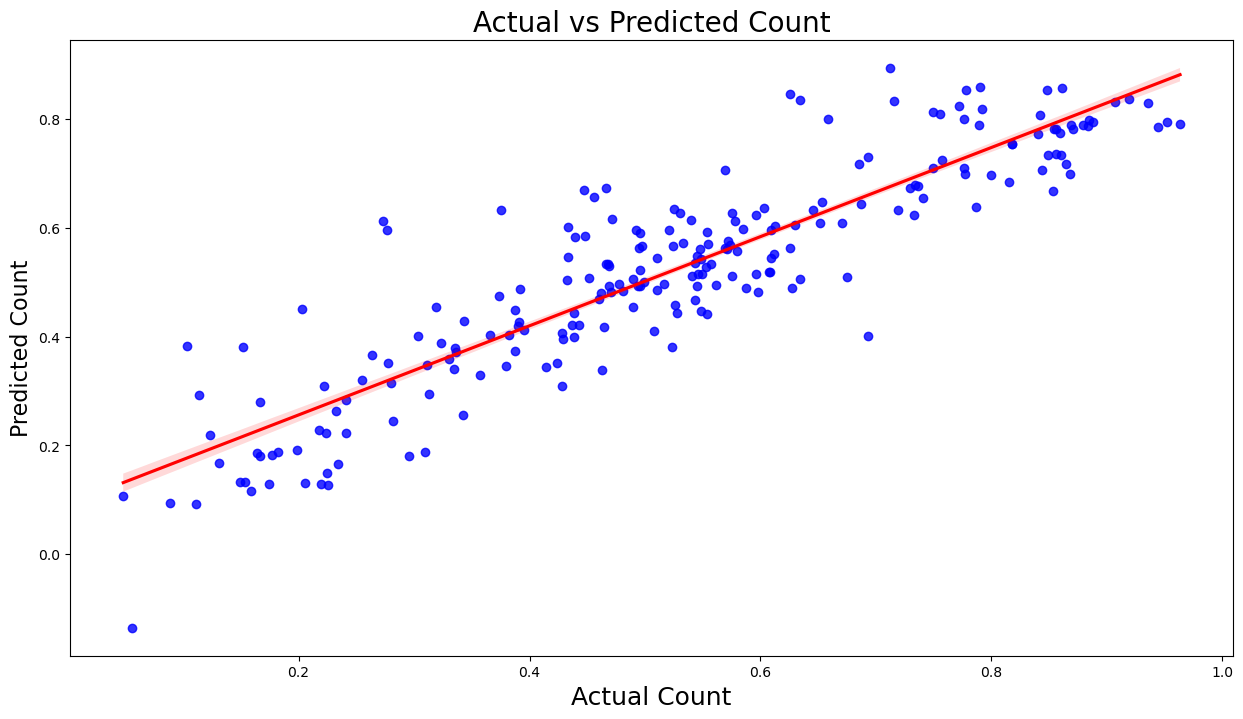

In [124]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Actual vs Predicted Count', fontsize=20)
plt.xlabel('Actual Count', fontsize=18)
plt.ylabel('Predicted Count', fontsize=16)
plt.show()

The comparison between the training and testing datasets reveals the following metrics for evaluating the regression model:
The R-squared value for the training dataset is 0.833, indicating that approximately 83.3% of the variability in the bike demand can be explained by the independent variables in the model.
The R-squared value for the testing dataset is 0.8038, suggesting that around 80.38% of the variability in the bike demand is captured by the model on unseen data.
The adjusted R-squared value for the training dataset is 0.829, which takes into account the number of predictors in the model, providing a more reliable measure of the model's goodness of fit.
The adjusted R-squared value for the testing dataset is 0.7944, reflecting the adjusted goodness of fit on unseen data.
The demand of bikes is influenced by various factors such as year, holiday, temperature, windspeed, September month, presence of light snow/rain, misty conditions, and the seasons of spring, summer, and winter.

These metrics and the specified independent variables provide insights into the performance of the regression model in predicting bike demand and highlight the key factors affecting it.